#**GRIP : THE SPARK FOUNDATION**
# Data Science and Business Analytics Intern
# Author : Md Azim Babu
# TASK 2: Prediction Using Unsupervised Machine Learning
Task Aim : The aim of this task is to predict the optimum number of clusters from the 'Iris' dataset.


**STEP : 1 Importing the data**

In [1]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
# Loading the iris data

dataset = datasets.load_iris()
dataset = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [3]:
# Viewing the data

dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



**STEP 2 : Finding the optimum number of clusters** 

Before clustering the data using kmeans, we need to specify the number of clusters. In order to find the optimum number of clusters, there are various methods available like Silhouette Coefficient and the Elbow method. Here, the elbow method is used.

**What is Elbow method?**
The number of clusters are varies within a certain range. For each number, within-cluster sum of square value is calculated and stored in a list. These value are then plotted against the range of number of clusters used before. The location of bend in the 2d plot indicates the appropiate number of clusters.

In [22]:
# Calculating the within-cluster sum of square
x = dataset.iloc[:, [0, 1, 2, 3]].values


within_cluster_sum_of_square = []

clusters_range = range(1,11)
for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    within_cluster_sum_of_square.append(km.inertia_)

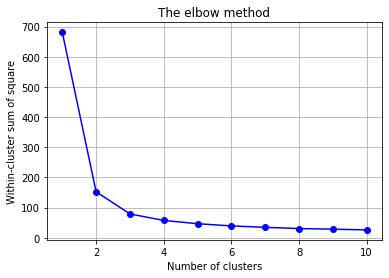

In [23]:
# Plotting the "within-cluster sum of square" against clusters range

plt.plot(clusters_range, within_cluster_sum_of_square, 'go-', color='blue')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()

**STEP 3 : Applying k means clustering on the data**

In [25]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(x)

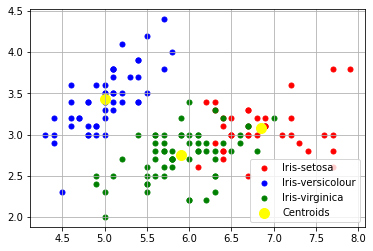

In [26]:
# Visualising the clusters - On the first two columns

plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 25, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 25, c = 'green', label = 'Iris-virginica')

# Plotting the cluster centers

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()